<a href="https://colab.research.google.com/github/pa-shk/iad-intro-ds-practical-tasks/blob/main/hw04_knn_linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [ ]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

В наборе отсутствуют пропущенные значения и категориальные признаки.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
knns = [KNeighborsClassifier(n_neighbors=n) for n in (1, 3, 5, 10, 15, 25)]

In [ ]:
X_train = X_train.loc[:, ['alcohol', 'magnesium']] # select only feature given in the task description
X_test = X_test.loc[:, ['alcohol', 'magnesium']]

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit on training data and transform training data
X_test = scaler.transform(X_test) # transform test data

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
for knn in knns:
    knn.fit(X_train, y_train)
    print('Neighbours:', knn.n_neighbors)
    print('Train:', accuracy_score(y_train, knn.predict(X_train)))
    print('Test:', accuracy_score(y_test, knn.predict(X_test)))
    print()

Neighbours: 1
Train: 1.0
Test: 0.6111111111111112

Neighbours: 3
Train: 0.8306451612903226
Test: 0.5555555555555556

Neighbours: 5
Train: 0.8064516129032258
Test: 0.5925925925925926

Neighbours: 10
Train: 0.7903225806451613
Test: 0.5925925925925926

Neighbours: 15
Train: 0.7419354838709677
Test: 0.5370370370370371

Neighbours: 25
Train: 0.7580645161290323
Test: 0.5185185185185185



**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

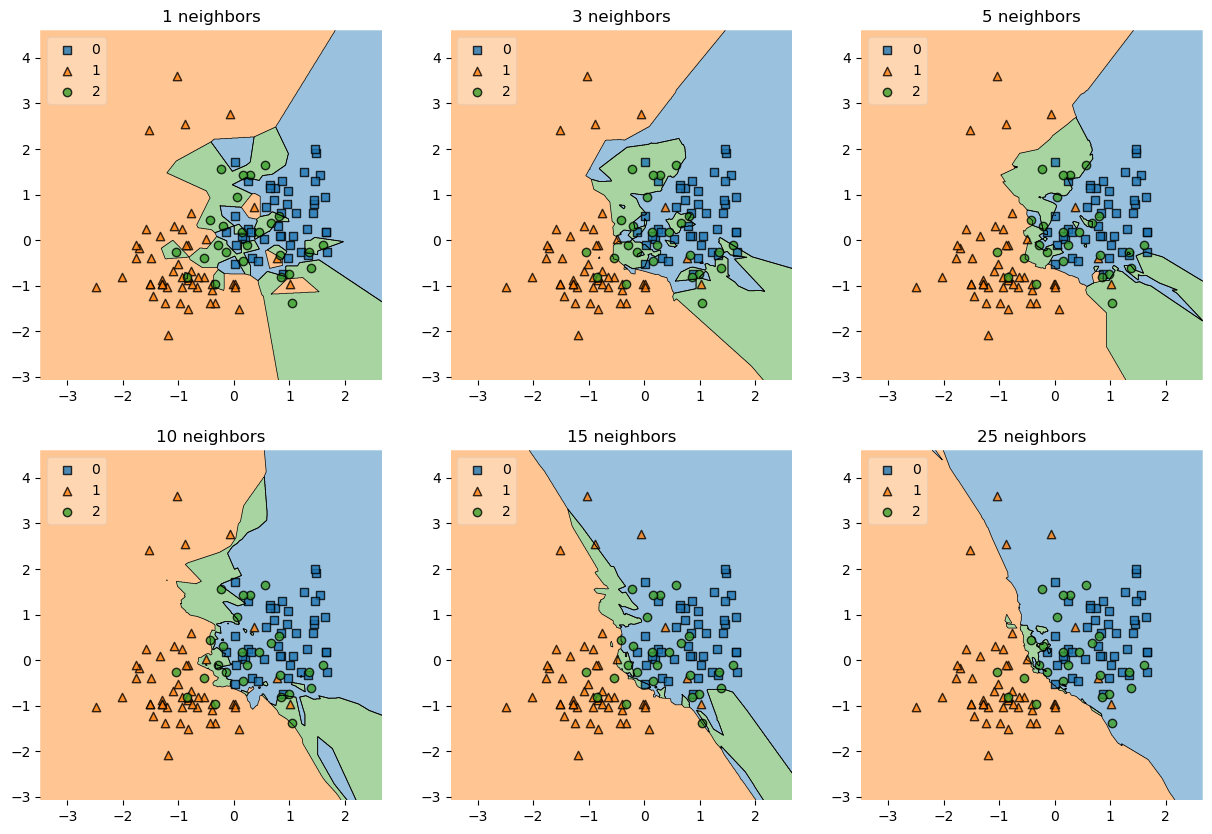

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15,10))

for clf, lab, grd in zip(knns,
                         (f'{knn.n_neighbors} neighbors' for knn in knns),
                         itertools.product([0, 1], [0, 1, 2])):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Для обучения классификатора оптимально использовать 5-10 соседей, с такими гиперпараметрами наблюдается лучшее качество на тестовой выборке. С кол-во соседей k=1, модель показывает идеальный результат на тренировочной выборке, но качество на тестовой выборке значительно падает, что свидетельствует о переобучении, для k=3 наблюдается похожая ситуация, хотя разрыв между качеством на трейне и на тесте уменьшается. Для k=15 и k=25 наблюдается более низкое качество и на трейне и на тесте, чем при оптимальных k.

Также если мы посмотрим на визуализацию, то видно, что при k=1 для каждой точки появляется свой отдельный "островок", что также говорит о переобучении, при k=3 границы также слишком изогнутые, площадь одного класса очень старанным образом врезается в площадь другого, при k=5 и при k=10 границы более плавные, при этом большая часть меток классов оказывется на территории своего класса, а при k=15 и при k=25 сильно сужается/почти исчезает площадь для "зеленого" класса, также граница "голубого" класса заезжает на границу "оранжевого" класса в верхнем левом углу, в целом границы становятся более грубыми, прямыми. Это говорит о том, что при увеличении k модель будет приближаться к константной, выдавая метку класса  с наибольшим количеством объектов и игнорируя остальные классы.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

![image.png](attachment:./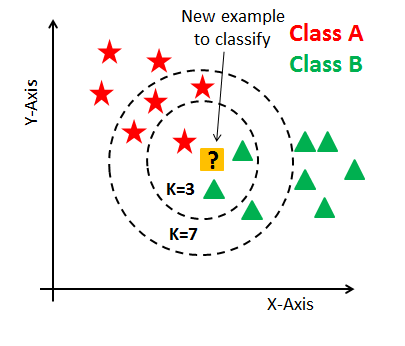)

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    """
    A class which is my own simplified implementation of knn alghorithm
    ...
    Atributes
    ___
    k: int
        number of neighbours
    X: 1d numpy array
        features matrix
    y: numpy array
        labels vector

    Methods
    ___
    fit
        saves training data
    predict
        makes predictions
    _predict_1d
        makes prediction for 1 object
    """

    def __init__(self, k:int):
        """
        Constructs all the necessary attributes
        """
        self.k = k
        self.X = None
        self.y = None


    def fit(self, X, y):
        """
        Saves features matrix and targets vector from traing set
        Returns the instance of the class
        """
        self.X, self.y = X, y
        return self


    def predict(self, X):
        """
        Generates prediction
        Returns predictions
        """
        return np.apply_along_axis(self._predict_1d, axis=1, arr=X)


    def _predict_1d(self, object_):
        """
        Generate predicted label for 1 object
        Returns predicted label
        """
        distances = np.apply_along_axis(np.linalg.norm, axis=1, arr=self.X - object_)   # calculate euclidean distance between feature vector of given object
                                                                                        # and objects in training data
        neighbours_indexes = np.argpartition(distances, kth=self.k) # create list of indexes of partitioned elements
        neighbours = np.take(self.y, neighbours_indexes)[:self.k]   # select nearest labels by indexes
        return Counter(neighbours).most_common()[0][0]  # return label with the highest frequency

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [ ]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Пропушенных значений нет

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
data['Unnamed: 0']

0            1
1            2
2            3
3            4
4            5
         ...  
53935    53936
53936    53937
53937    53938
53938    53939
53939    53940
Name: Unnamed: 0, Length: 53940, dtype: int64

In [ ]:
data['Unnamed: 0'].nunique()

53940

In [ ]:
data.shape

(53940, 11)

Видимо признак `Unnamed: 0` представляет собой просто порядковый номер строки

In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
correlations = data.corr()
correlations

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


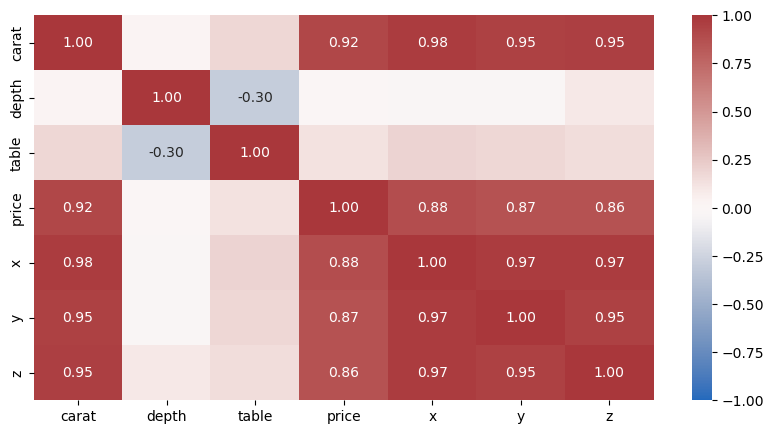

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.heatmap(correlations, cmap="vlag", annot=True, fmt="0.2f", vmin=-1, vmax=1)
for t in ax.texts:
    if float(t.get_text()) >= 0.3 or float(t.get_text()) <= -0.3:
        t.set_text(t.get_text())
    else:
        t.set_text("")

Целевая переменная `Price` (цена) больше всего коррелирует с признаками `carat`, `х`, `y`, `z` (во всех случаях корреляция положительная). Это вполне объяснимо, так как данные признаки обозначают вес (`carat`) и размеры (`х`, `y`, `z`) бриллиантов.

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
cat_columns = data.select_dtypes(include=['object']).columns

In [ ]:
data = pd.get_dummies(data=data, columns=cat_columns, drop_first=True)

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

Сначала выделим признаки и целевую пременную

In [ ]:
X, y = data.drop(columns=['price']), data.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

Ошибка на тренировочных данных

In [ ]:
mean_squared_error(y_train, linreg.predict(X_train))

1261876.1766472566

Ошибка на тестовых данных

In [ ]:
mean_squared_error(y_test, linreg.predict(X_test))

1550040.8221890475

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
linreg.coef_

array([ 5354.73564161,   -19.32946115,   -70.15411239, -2457.2797632 ,
        1878.39163722,  -634.4005088 ,   137.53625672,   360.80027354,
         305.37180959,   230.502967  ,   -81.9419338 ,   -99.49160232,
        -206.73193682,  -339.7200981 ,  -460.62996298,  -508.48317812,
         888.54885204,  1429.66382899,   925.99738518,  1528.72280054,
        1654.32245206,  1180.02271915,  1346.08218725])

Для наглядности создадим стобчатую диаграмму

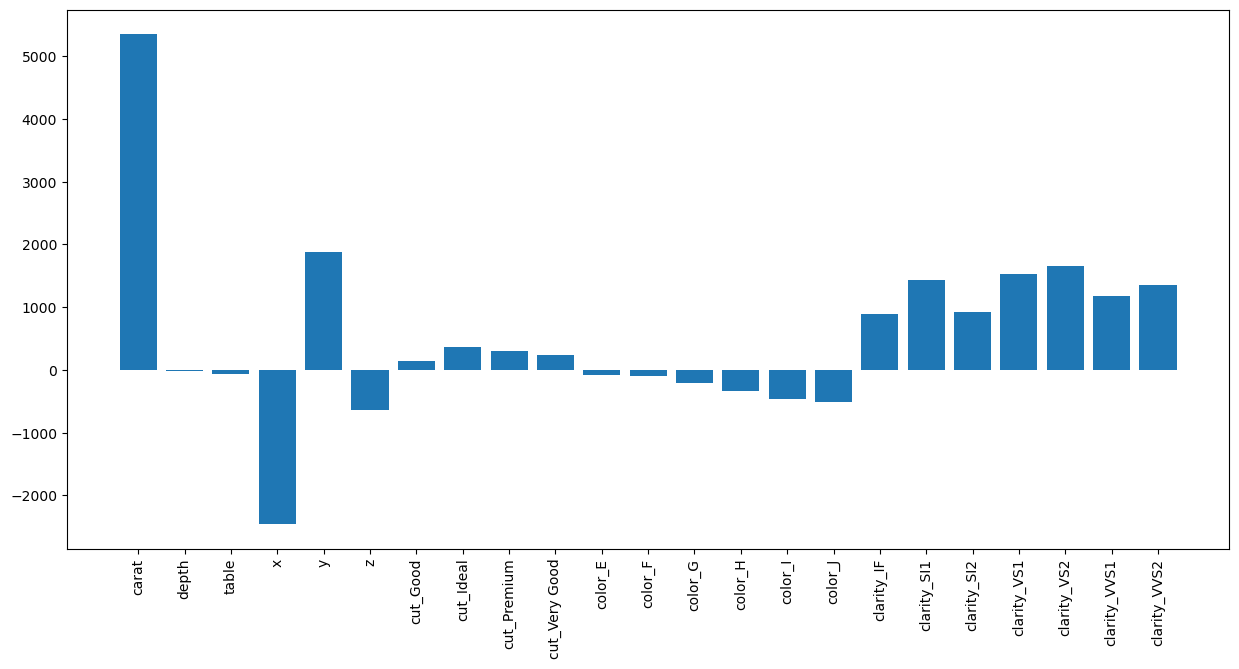

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(X.columns, linreg.coef_, width=0.8)
plt.xticks(rotation=90)
plt.show()

Признаком с наибольшим весом в 5000 является `carat`, далее с весами около 2000 по модулю `x` и `y`, и группа признаков `clarity_...`, с весами около 1000, остальные признаки имеют веса на порядок меньше.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso, Ridge
lasso_10, ridge_10 = Lasso(alpha=10).fit(X_train, y_train), Ridge(alpha=10).fit(X_train, y_train)

In [ ]:
np.linalg.norm(linreg.coef_, 1)

22098.861368571084

In [ ]:
np.linalg.norm(lasso_10.coef_, 1)

13039.355478685202

In [ ]:
np.linalg.norm(ridge_10.coef_, 1)

19932.63809496675

При  использовании лассо-регрессии сумма абсолютных значений весов сократилась почти в 2 раза, веса ридж-регрессии также уменьшились, хотя и не столь значительно. Таким образом, некоторая мультиколлинеарность точно имеется, но насколько сильнаая, довольно сложно сказать.

Вообще, один из [учебных ассистентов](https://t.me/roman_khamrin) посоветовал мне здесь написать, что "все познается в сравнении". Так что ниже будет сравнение с регрессией обученной на искусственно "испорченных" данных с добавлением линейно зависимого признака.

In [ ]:
X_train_spolied = pd.DataFrame(X_train)
X_train_spolied['linear_dependent'] = X_train_spolied[0] + 1
X_train_spolied = np.array(X_train_spolied)

In [ ]:
linreg_collinear = LinearRegression().fit(X_train_spolied, y_train)
lasso_collinear = Lasso(alpha=10).fit(X_train_spolied, y_train)
ridge_collinear = Ridge(alpha=10).fit(X_train_spolied, y_train)

In [ ]:
np.linalg.norm(linreg_collinear.coef_, 1)

108659010638475.72

In [ ]:
np.linalg.norm(lasso_collinear.coef_, 1)

13034.918930754007

In [ ]:
np.linalg.norm(ridge_collinear.coef_, 1)

19991.477786215568

В случае с присутствием полной мультиколлинеарности между некоторыми признаки разница суммы весов обычной линейной регрессии и регрессии с регуляризацией составляет несколько порядков. А у нас все гораздо лучше, полной мультиколлинеарности нет (что также видно по таблице корреляций)

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [ ]:
alphas = (0.1, 1, 10, 100, 200)
lasso_weights = []
ridge_weights = []
for a in alphas:
    l1_reg = Lasso(alpha=a, max_iter=5000)
    l1_reg.fit(X_train, y_train)
    lasso_weights.append(np.linalg.norm(l1_reg.coef_))

    l2_reg = Ridge(alpha=a)
    l2_reg.fit(X_train, y_train)
    ridge_weights.append(np.linalg.norm(l2_reg.coef_))

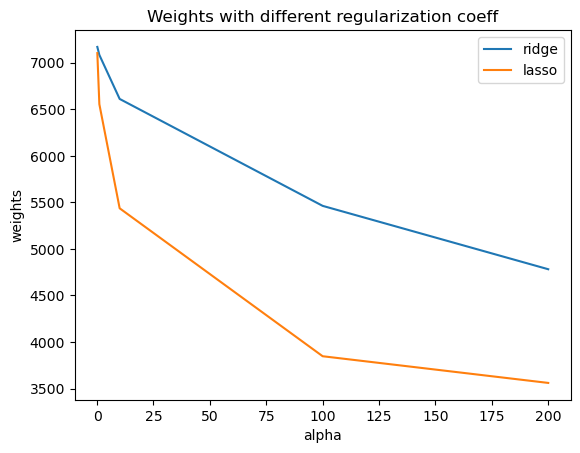

In [ ]:
fig, ax = plt.subplots()

ax.plot(alphas, ridge_weights, label='ridge')
ax.plot(alphas, lasso_weights, label='lasso')

ax.set_xlabel('alpha')
ax.set_ylabel('weights')

ax.set_title("Weights with different regularization coeff")
ax.legend()

plt.show()

Lasso-регрессия агрессивнее снижает веса. Также Lasso-регрессия используется для отбора признаков, так как при Lasso-регрессии значение весов некоторых признаков будет уменьшено до 0 (см. лекцию)

**Задача 3.11 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV
reg_cv = LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5, max_iter=5000)
reg_cv.fit(X_train, y_train)

LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5, max_iter=5000)

In [ ]:
mse = reg_cv.mse_path_
mse

array([[2100949.01056882, 2181516.26367467, 2108884.54430633,
        2146142.94372528, 2174579.3228386 ],
       [1782603.22733735, 1785253.3850194 , 1728149.78030391,
        1756817.0304224 , 1806412.21480588],
       [1441776.48763333, 1330545.84793348, 1271527.81419194,
        1305076.44729931, 1333826.50834085],
       [1440319.87714343, 1292114.07629876, 1199099.39758119,
        1244760.48497901, 1258689.80932929],
       [1503527.94554901, 1291631.6739856 , 1194174.57061616,
        1241717.2227161 , 1253328.04098965]])

In [ ]:
mse = np.apply_along_axis(np.mean, axis=1, arr=mse) # get average values

In [ ]:
alphas = pd.DataFrame(mse, reg_cv.alphas_, columns=['mse']) # create dataframe with average mse
alphas.style.apply(lambda x: ['background-color: yellow'] if x.mse == alphas.mse.min()
                   else ['background-color: white'], axis = 1) # format dataframe to highlight the minimal mse

,mse
200.000000,2142414.417023
100.000000,1771847.127578
10.000000,1336550.621080
1.000000,1286996.729066
0.100000,1296875.890771


In [ ]:
best_alpha = alphas[['mse']].idxmin()[0]
best_alpha

1.0

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
lasso_1 = Lasso(alpha=best_alpha, max_iter=5000)
lasso_1.fit(X_train, y_train)
pd.DataFrame(lasso_1.coef_, X.columns, columns=['weight'])

,weight
carat,5313.570236
depth,-54.017960
table,-74.555445
x,-1432.330925
y,662.409466
z,-401.454964
cut_Good,144.127534
cut_Ideal,366.815891
cut_Premium,294.860165
cut_Very Good,245.415953


Для наглядности построим столбчатую диаграмму для весов линейной регрессии без регуляризации и Lasso-регрессии

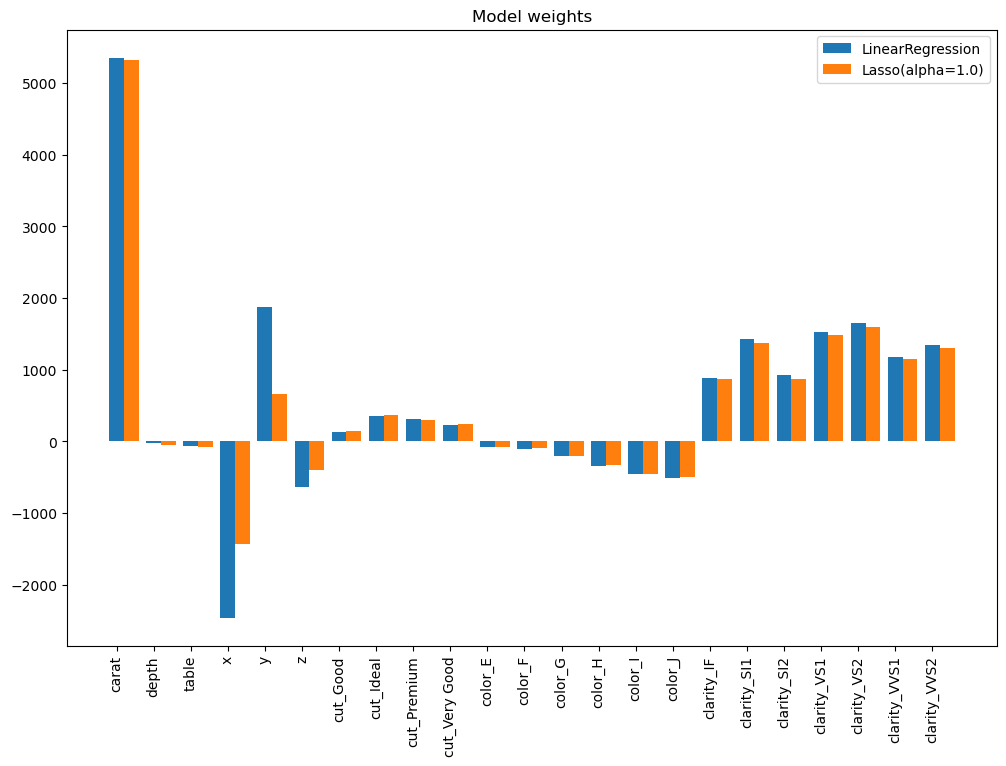

In [ ]:
fig = plt.subplots(figsize=(12, 8))
bar_width = 0.4
br1 = np.arange(len(X.columns)) # position of bars for linreg
br2 = (lambda x: x + bar_width)(br1) # possition of bars for lasso reg

plt.bar(br1, linreg.coef_, width=bar_width, label ='LinearRegression')
plt.bar(br2, lasso_1.coef_, width=bar_width, label =f'Lasso(alpha={best_alpha})')
plt.xticks(np.arange(len(X.columns)), X.columns, rotation=90)
plt.title('Model weights')
plt.legend()
plt.show()

В данном случае для всех признаков сохранились ненулевые веса (значение коэффициента регуляризации не очень большое). Однако значительно снизились абсолютные значения весов для признаков `x`, `y`. Как раз данные признаки больше всего коррелировали друг с другом и с признаком `carat`. Как и для регрессии без регуляризации, наибольший вес имеет признак `carat`, более того, его вес почти не уменьшился, все это говорит о том, что `carat` - это наиболее информативный признак.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

Лассо-регрессия

In [ ]:
mean_squared_error(y_test, lasso_1.predict(X_test))

1324620.8715446917

Линейная регрессия без регуляризации

In [ ]:
mean_squared_error(y_test, linreg.predict(X_test))

1550040.8221890475

Судя по ошибке на тесте, лучше использовать Lasso-регрессию. Использование регуляризации позволяет уменьшить веса модели, что делает ее более устоичивой к незначительному изменению распределения данных, то есть повышает способность модели к обобщению.